## Observations and Insights 

The integrity of the data set provided appears strong, as the number of mice per drug regimine is relatively proportionate and the Gender spread is nearly 50/50. The data examines all possible conditions that could affect outcomes.

When analyzing the box and whisker plots, Capomulin and Ramicane returned similar results with respect to final tumor volume. Infubinol and Ceftamin also produced similar results, but with higher final tumor vaolumes. This demonstrates that Capomulin and Ramicane are more effective at shrinking tumors.

The line plot clearly shows that the longer the mice are on the treatment, the smaller the tumors become. The scatter plot comparing mouse weight to tumor volume shows, as one would expect, that the heavier the mouse, the larger the volume of the tumor. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
combined_mouse_study_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [3]:
combined_mouse_study_df["Weight (g)"] = combined_mouse_study_df["Weight (g)"].astype(float)

In [4]:
combined_mouse_study_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)            float64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [5]:
# Checking the number of unique mice
mouse_count_df = combined_mouse_study_df["Mouse ID"].nunique()
print (mouse_count_df)

249


In [6]:
# Number of mice
combined_mouse_study_df["Mouse ID"].count()


1893

In [7]:
# First attempt to get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#mouse_grouped_df = combined_mouse_study_df.groupby(['Mouse ID', 'Timepoint']).first()
  
# print new dataframe
#print(mouse_grouped_df)

In [8]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_mouse_study_df.loc[combined_mouse_study_df.duplicated(subset=['Mouse ID'])]
combined_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16.0,0,45.000000,0
1,k403,Ramicane,Male,21,16.0,5,38.825898,0
2,k403,Ramicane,Male,21,16.0,10,35.014271,1
3,k403,Ramicane,Male,21,16.0,15,34.223992,1
4,k403,Ramicane,Male,21,16.0,20,32.997729,1


In [9]:
#attempt to drop duplicate mouseid rows
#combined_mouse_study_df.drop_duplicates(subset = ['Mouse ID'], keep = False)
#print (combined_mouse_study_df)

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_mouse_study_df.drop_duplicates("Mouse ID")
clean_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16.0,0,45.0,0
10,s185,Capomulin,Female,3,17.0,0,45.0,0
20,x401,Capomulin,Female,16,15.0,0,45.0,0
30,m601,Capomulin,Male,22,17.0,0,45.0,0
40,g791,Ramicane,Male,11,16.0,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28.0,0,45.0,0
1860,z435,Propriva,Female,12,26.0,0,45.0,0
1863,z581,Infubinol,Female,24,25.0,0,45.0,0
1873,z795,Naftisol,Female,13,29.0,0,45.0,0


In [11]:
# Checking the number of mice in the clean DataFrame.
# As shown above, 249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the properties of each drug regimen: 
mean = combined_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
    "Mean": mean, 
    "Median": median, 
    "Variance": variance, 
    "Standard Deviation": standard_dv, 
    "SEM": sem
})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Treatment Count')

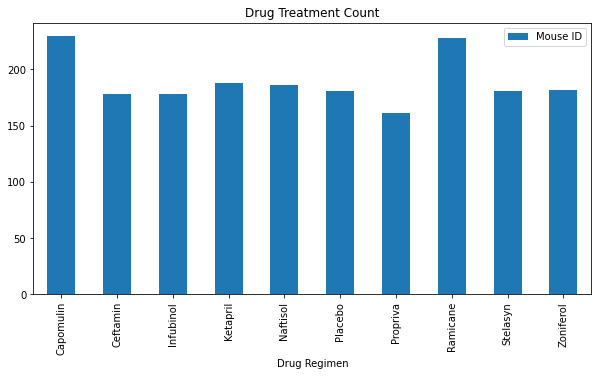

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Select data points
treatment_data = pd.DataFrame(combined_mouse_study_df.groupby(["Drug Regimen"]).count()).reset_index()
treatment_df = treatment_data[["Drug Regimen", "Mouse ID"]]
treatment_df = treatment_df.set_index("Drug Regimen")

# Create bar chart
treatment_df.plot(kind="bar", figsize = (10,5))
plt.title("Drug Treatment Count")

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

In [15]:
# Display list of treatments
drug_list = summary_df.index.tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [16]:
# Set as a list
drug_count = (combined_mouse_study_df.groupby(["Drug Regimen"])["Weight (g)"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Count')

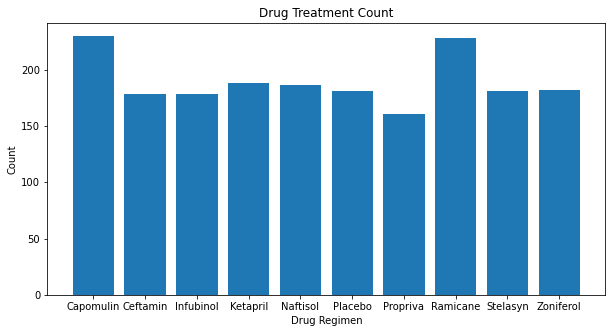

In [17]:
# Assign x-axis
x_axis = drug_list

# Customize bar chart
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug_count, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [19]:
#Grab correct data points
gender_df = pd.DataFrame(combined_mouse_study_df.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

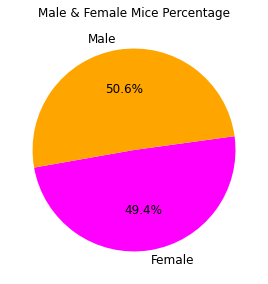

In [20]:
# Create pie plot
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121,aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%', colors = ["magenta" , "orange"],
              startangle=190, labels=gender_df["Sex"], legend=False, fontsize=12)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Grab datapoints
gender_count = (combined_mouse_study_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count


[935, 958]

Text(0.5, 1.0, 'Male & Female Mice Percentage')

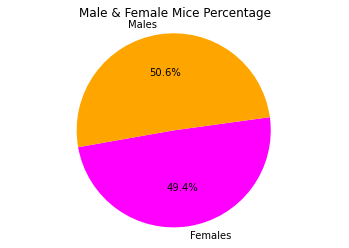

In [22]:
#Create and customize pie plot
labels = ["Females", "Males"]
colors = ["magenta" , "orange"]
plt.pie(gender_count, labels=labels, colors=colors, autopct="%1.1f%%", startangle=190)
plt.axis("equal")
plt.title("Male & Female Mice Percentage")

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [24]:
# Identify last (greatest) timepoint for each mouse id
sort_df = combined_mouse_study_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sort_df.loc[sort_df["Timepoint"] == 45]
last_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22.0,45,38.982878,2
1,299,b742,Capomulin,Male,7,21.0,45,38.939633,0
2,244,g288,Capomulin,Male,3,19.0,45,37.074024,1
3,360,g316,Capomulin,Female,22,22.0,45,40.159220,2
4,440,i557,Capomulin,Female,1,24.0,45,47.685963,1


In [25]:
# grab Capomulin data 
cap_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
cap_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22.0,45,38.982878,2
1,299,b742,Capomulin,Male,7,21.0,45,38.939633,0
2,244,g288,Capomulin,Male,3,19.0,45,37.074024,1
3,360,g316,Capomulin,Female,22,22.0,45,40.159220,2
4,440,i557,Capomulin,Female,1,24.0,45,47.685963,1


In [26]:
# Add Tumor Volume column
cap_obj = cap_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_obj = cap_obj["Tumor Volume (mm3)"]
cap_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [27]:
# Calculate Capomulin quartiles
quartiles = cap_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


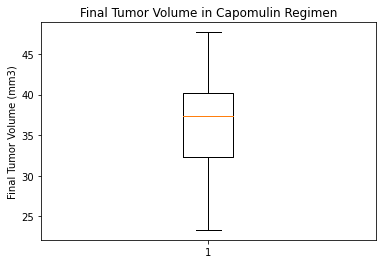

In [28]:
# Create box plot for final tumor volume of each mouse id
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(cap_obj)
plt.show()

In [29]:
# grab Ramicane data
ram_df = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
ram_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22.0,45,38.407618,1
1,430,a444,Ramicane,Female,10,25.0,45,43.047543,0
2,214,a520,Ramicane,Male,13,21.0,45,38.810366,1
3,174,a644,Ramicane,Female,7,17.0,45,32.978522,1
4,154,c758,Ramicane,Male,9,17.0,45,33.397653,1


In [30]:
# Add Tumor Volume column
ram_obj = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_obj = ram_obj["Tumor Volume (mm3)"]
ram_obj

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [31]:
# Calculate Ramicane quartiles
quartiles = ram_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The median of temperatures is: 34.848627300000004
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


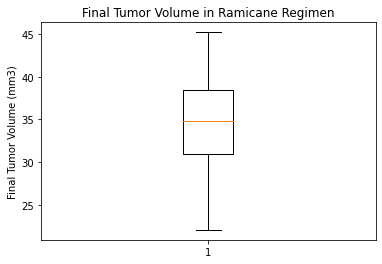

In [32]:
# Create box plot for final tumor volume of each mouse id
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(ram_obj)
plt.show()

In [33]:
# grab Infubinol data
inf_df = last_df[last_df["Drug Regimen"].isin(["Infubinol"])]
inf_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23.0,45,67.973419,2
1,473,a251,Infubinol,Female,21,25.0,45,65.525743,1
2,540,a685,Infubinol,Male,8,30.0,45,66.083066,3
3,637,c139,Infubinol,Male,11,28.0,45,72.226731,2
4,800,e476,Infubinol,Male,23,26.0,45,62.435404,1


In [34]:
# Add Tumor Volume column
inf_obj = inf_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_obj = inf_obj["Tumor Volume (mm3)"]
inf_obj

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [35]:
# Calculate Infubinol quartiles
quartiles = inf_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The median of temperatures is: 66.08306589
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


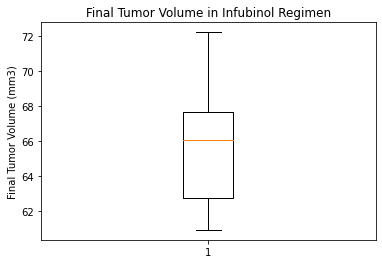

In [36]:
# Create box plot for final tumor volume of each mouse id
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(inf_obj)
plt.show()

In [37]:
# grab Ceftamin data
cef_df = last_df[last_df["Drug Regimen"].isin(["Ceftamin"])]
cef_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28.0,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30.0,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28.0,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28.0,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26.0,45,59.851956,3


In [38]:
# Add Tumor Volume column
cef_obj = cef_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_obj = cef_obj["Tumor Volume (mm3)"]
cef_obj

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [39]:
# Calculate Ceftamin quartiles
quartiles = cef_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The median of temperatures is: 64.29983003
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


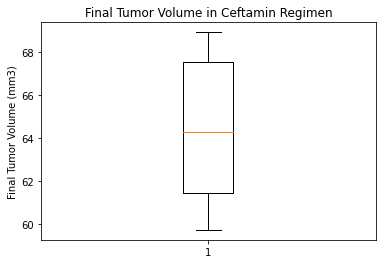

In [40]:
# Create box plot for final tumor volume of each mouse id
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ceftamin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(cef_obj)
plt.show()

## Line and Scatter Plots

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_mouse_study_df.loc[combined_mouse_study_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17.0,0,45.000000,0
1,11,s185,Capomulin,Female,3,17.0,5,43.878496,0
2,12,s185,Capomulin,Female,3,17.0,10,37.614948,0
3,13,s185,Capomulin,Female,3,17.0,15,38.177232,0
4,14,s185,Capomulin,Female,3,17.0,20,36.866876,0


In [42]:
# get Capomulin data for one mouse id
cap_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17.0,0,45.000000,0
1,11,s185,Capomulin,Female,3,17.0,5,43.878496,0
2,12,s185,Capomulin,Female,3,17.0,10,37.614948,0
3,13,s185,Capomulin,Female,3,17.0,15,38.177232,0
4,14,s185,Capomulin,Female,3,17.0,20,36.866876,0
5,15,s185,Capomulin,Female,3,17.0,25,33.949940,0
6,16,s185,Capomulin,Female,3,17.0,30,32.959671,1
7,17,s185,Capomulin,Female,3,17.0,35,28.328531,1
8,18,s185,Capomulin,Female,3,17.0,40,25.472143,1
9,19,s185,Capomulin,Female,3,17.0,45,23.343598,1


<AxesSubplot:xlabel='Timepoint'>

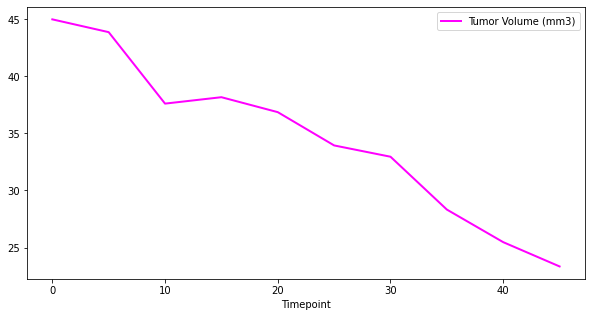

In [43]:
# Set 2 columns
cap_mouse = cap_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_mouse = cap_mouse.reset_index(drop=True)

#Create line plot
cap_mouse.set_index("Timepoint").plot(figsize=(10,5), linewidth=2, color="magenta")

In [44]:
# Create scatter plot for avg tumor volume / mouse weight using capomulin
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17.0,0,45.000000,0
1,11,s185,Capomulin,Female,3,17.0,5,43.878496,0
2,12,s185,Capomulin,Female,3,17.0,10,37.614948,0
3,13,s185,Capomulin,Female,3,17.0,15,38.177232,0
4,14,s185,Capomulin,Female,3,17.0,20,36.866876,0


In [45]:
#Arrange data into 3 columns
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17.0,45.000000
1,s185,17.0,43.878496
2,s185,17.0,37.614948
3,s185,17.0,38.177232
4,s185,17.0,36.866876


In [46]:
# Avg tumor volume per mouse 
avg_cap = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22.0,41.963636
1,b742,21.0,40.083699
2,f966,17.0,36.505973
3,g288,19.0,41.990097
4,g316,22.0,44.613344


In [47]:
# Rename tumor volume column
avg_cap = avg_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22.0,41.963636
1,b742,21.0,40.083699
2,f966,17.0,36.505973
3,g288,19.0,41.990097
4,g316,22.0,44.613344


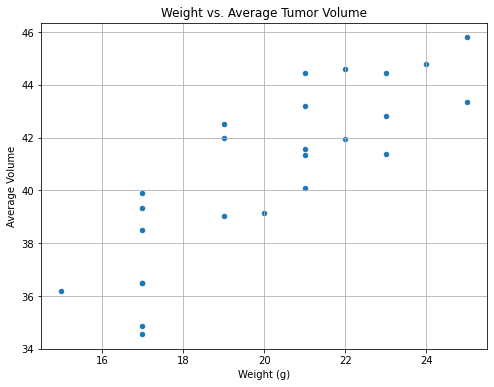

In [48]:
# Create scatter plot of mouse weight compared to avg tumor volume for Capomulin
avg_cap.plot(kind="scatter", 
             x="Weight (g)", 
             y="Average Volume", 
             grid=True, figsize=(8,6), 
             title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [49]:
#create variables

x_weight= avg_cap['Weight (g)']
y_volume= avg_cap['Average Volume']

x_list_w= x_weight
y_list_v= y_volume

linregress(x_list_w, y_list_v)

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

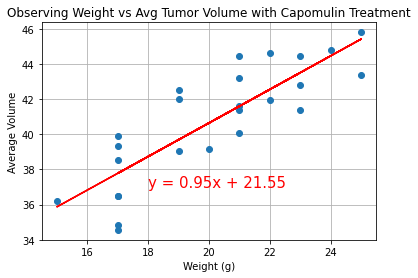

In [52]:
#plot line plot
fig3, ax3 = plt.subplots()

x_weight= avg_cap['Weight (g)']
y_volume= avg_cap['Average Volume']

# unpacking 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_list_w, y_list_v)

# y = mx + b
regress_values = x_weight * slope + intercept

line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


ax3.plot(x_weight, y_volume, 'o')

#lin regress line

line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_regress_eq,(18,37),fontsize=15,color="red")
plt.plot(x_weight,regress_values,"r-")

ax3.set_xlabel('Weight (g)')
ax3.set_ylabel('Average Volume')
ax3.set_title('Observing Weight vs Avg Tumor Volume with Capomulin Treatment')

# Set a grid on the plot
plt.grid()


plt.show()

In [53]:
correlation= round(st.pearsonr(x_list_w, y_list_v)[0],2)
#correlation
print(f"The correlation coefficient between weight and tumor volume for the Capomulin drug regimen is {correlation}")

The correlation coefficient between weight and tumor volume for the Capomulin drug regimen is 0.84
